## Load dependencies

In [61]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
from unet.labelme_utils import json_to_mask

## Read all the files

In [62]:
path_in = Path("data/data_labelme")

json_files = [p for p in Path(path_in).rglob("*interpolated.json") if p.is_file()]
img_files = [p for p in Path(path_in).rglob("*img.png") if p.is_file()]
img_bg_files = [p for p in Path(path_in).rglob("*img_bg.png") if p.is_file()]
unet_pred_files = [p for p in Path(path_in).rglob("*pred.bmp") if p.is_file()]


sorted_json_files = sorted(json_files)
sorted_img_files = sorted(img_files)
sorted_img_bg_files = sorted(img_bg_files)
sorted_unet_pred_files = sorted(unet_pred_files)

## Check the files

In [63]:
print(len(sorted_json_files))
print(len(sorted_img_files))
print(len(sorted_img_bg_files))
print(len(sorted_unet_pred_files))

5
5
5
5


## Load files

In [64]:
imgs = [np.array(Image.open(f)) for f in sorted_img_files]
img_bgs = [np.array(Image.open(f)) for f in sorted_img_bg_files]
unet_preds = [np.array(Image.open(f)) for f in sorted_unet_pred_files]

In [65]:
labelme_masks = json_to_mask(sorted_json_files)

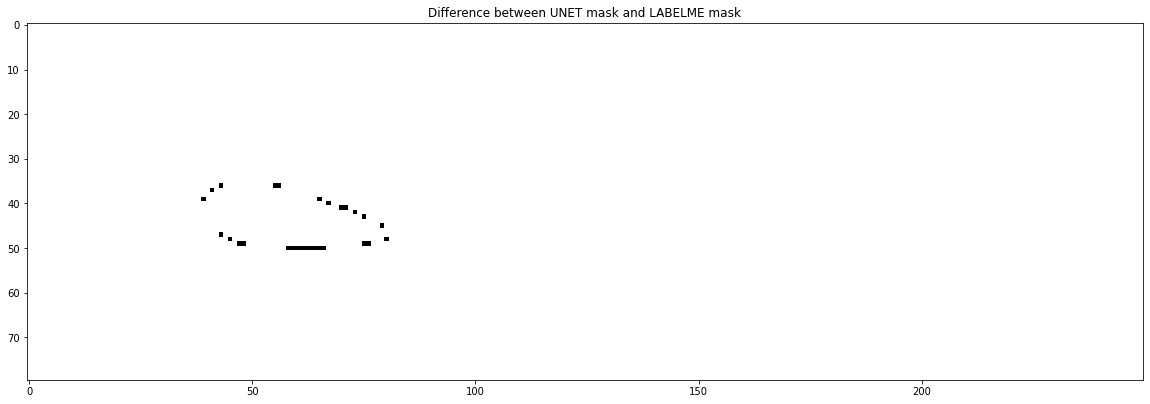

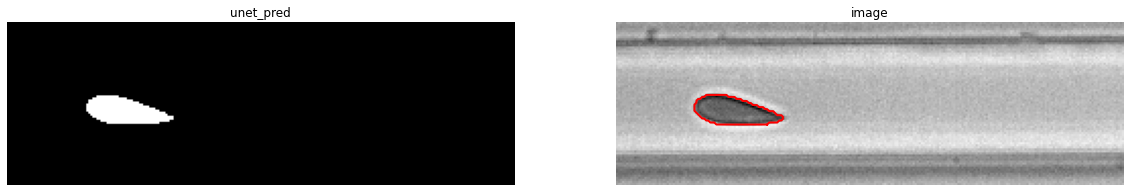

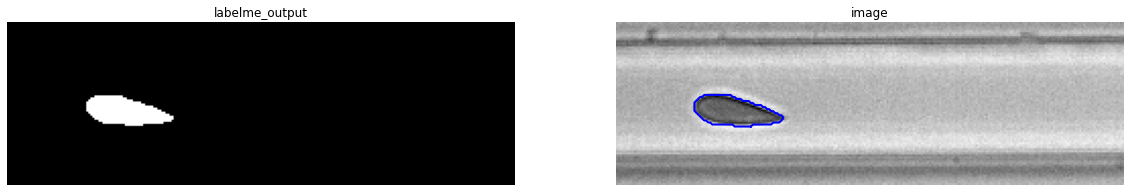

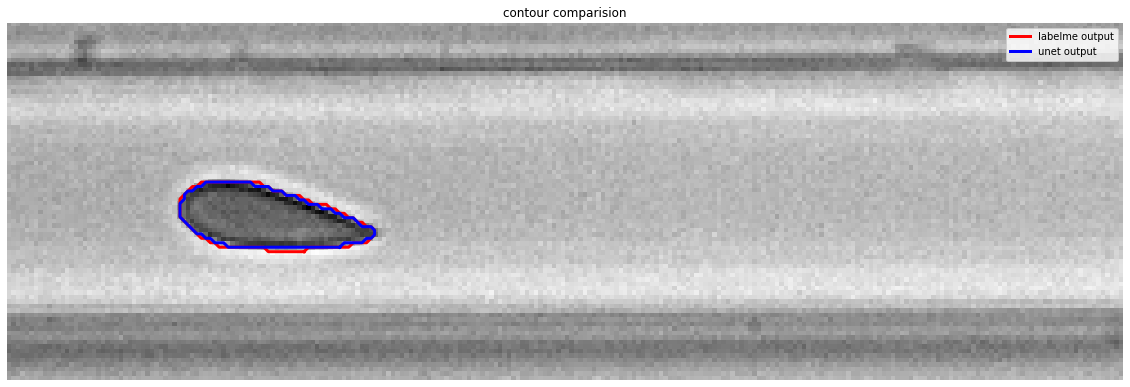

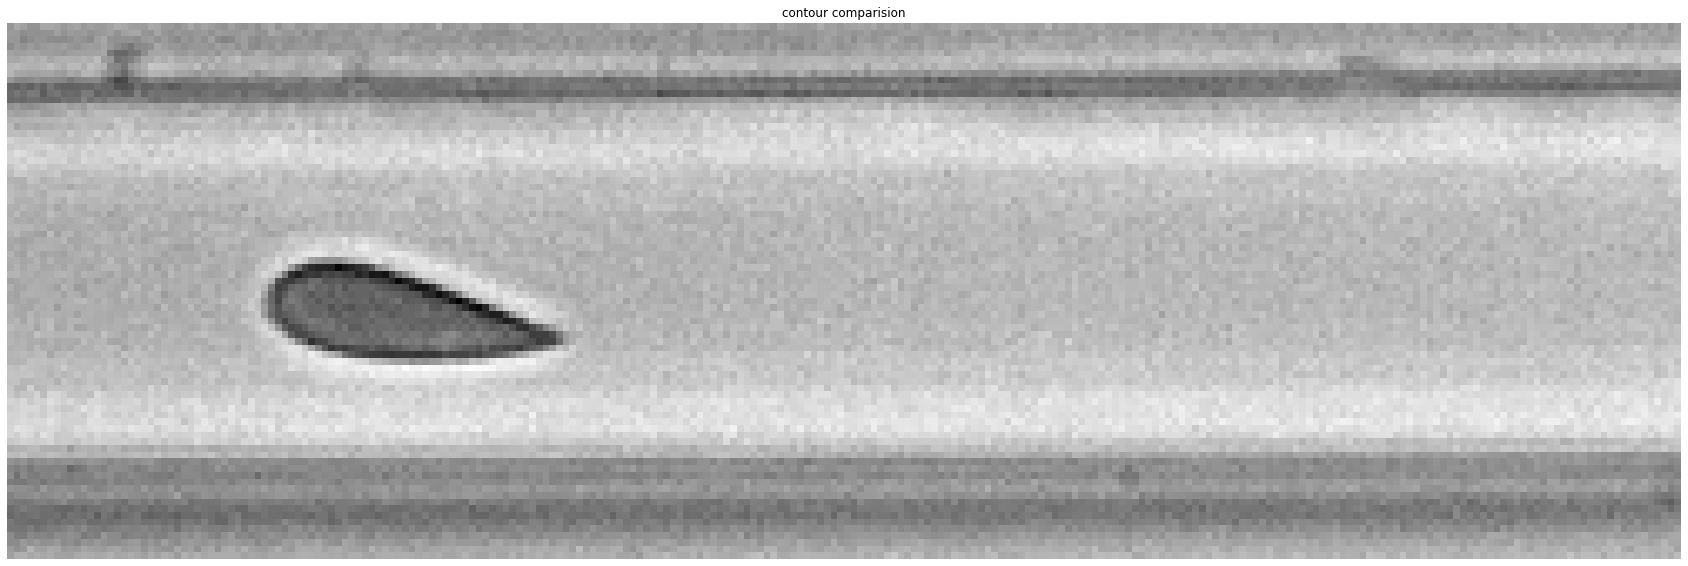

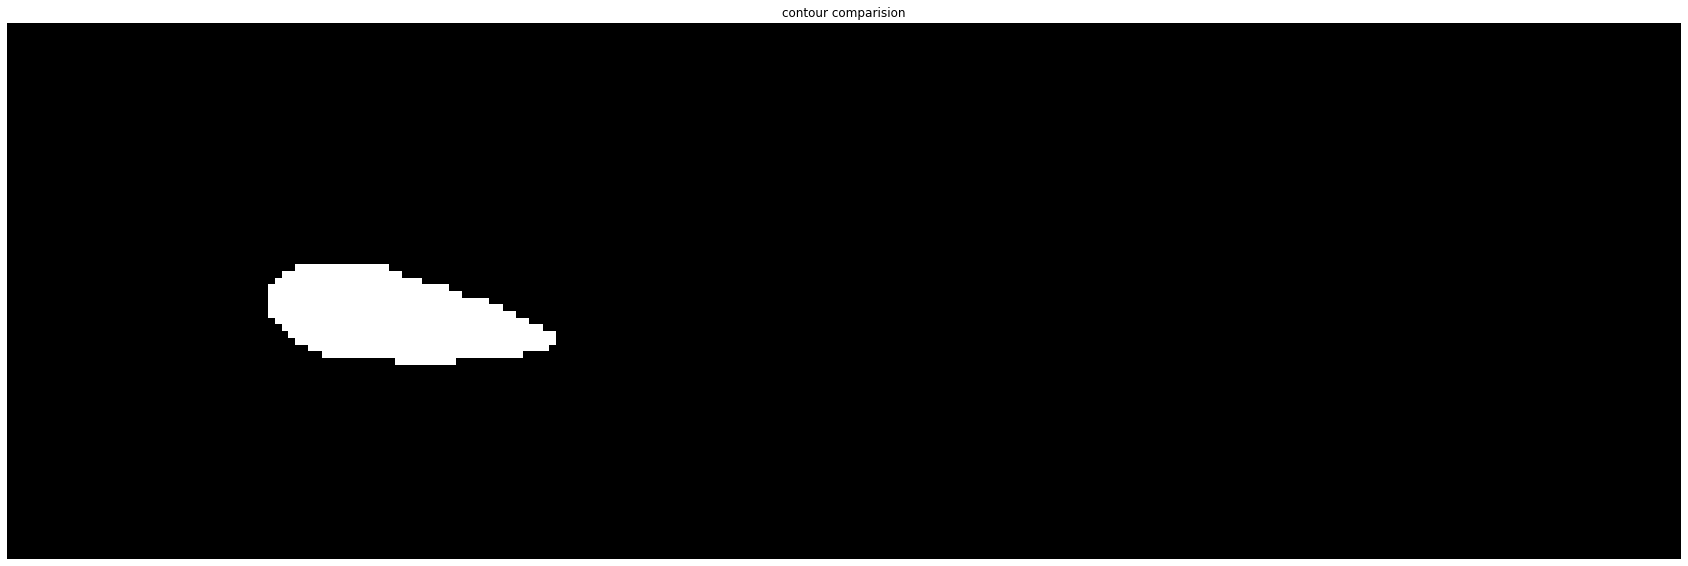

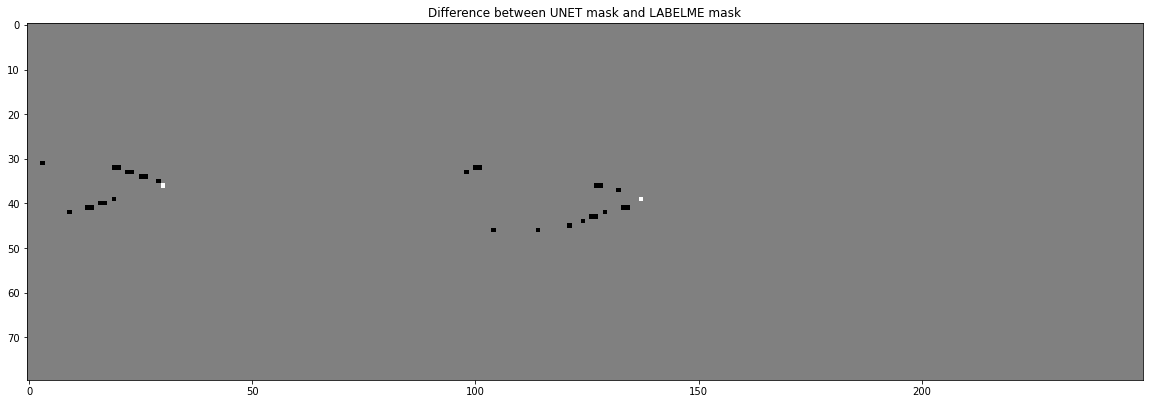

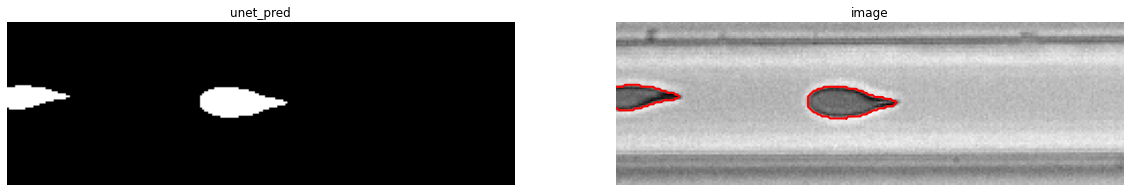

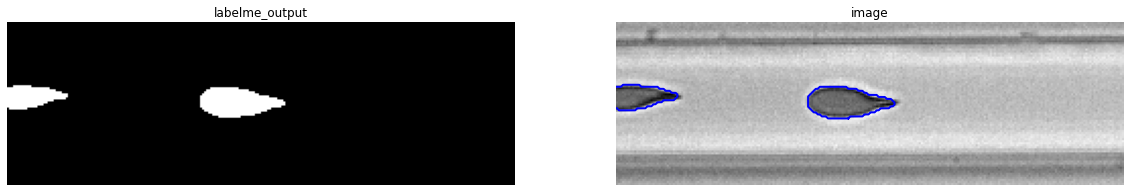

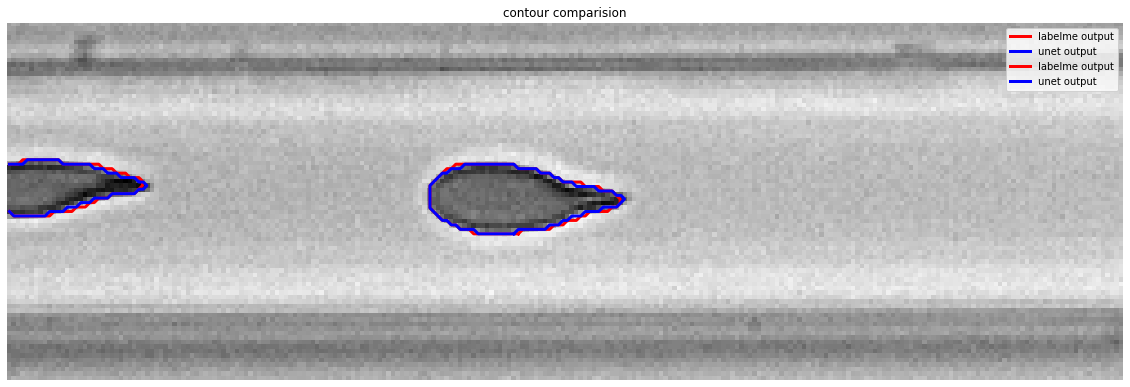

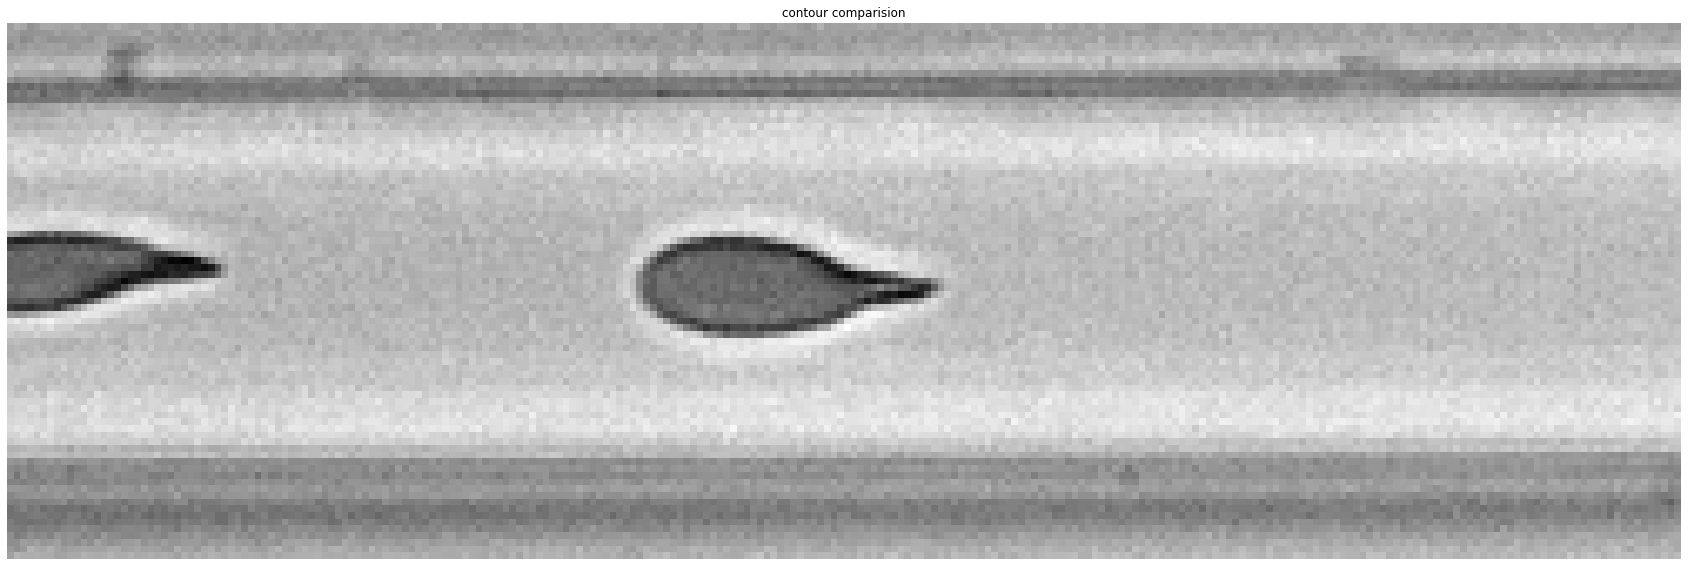

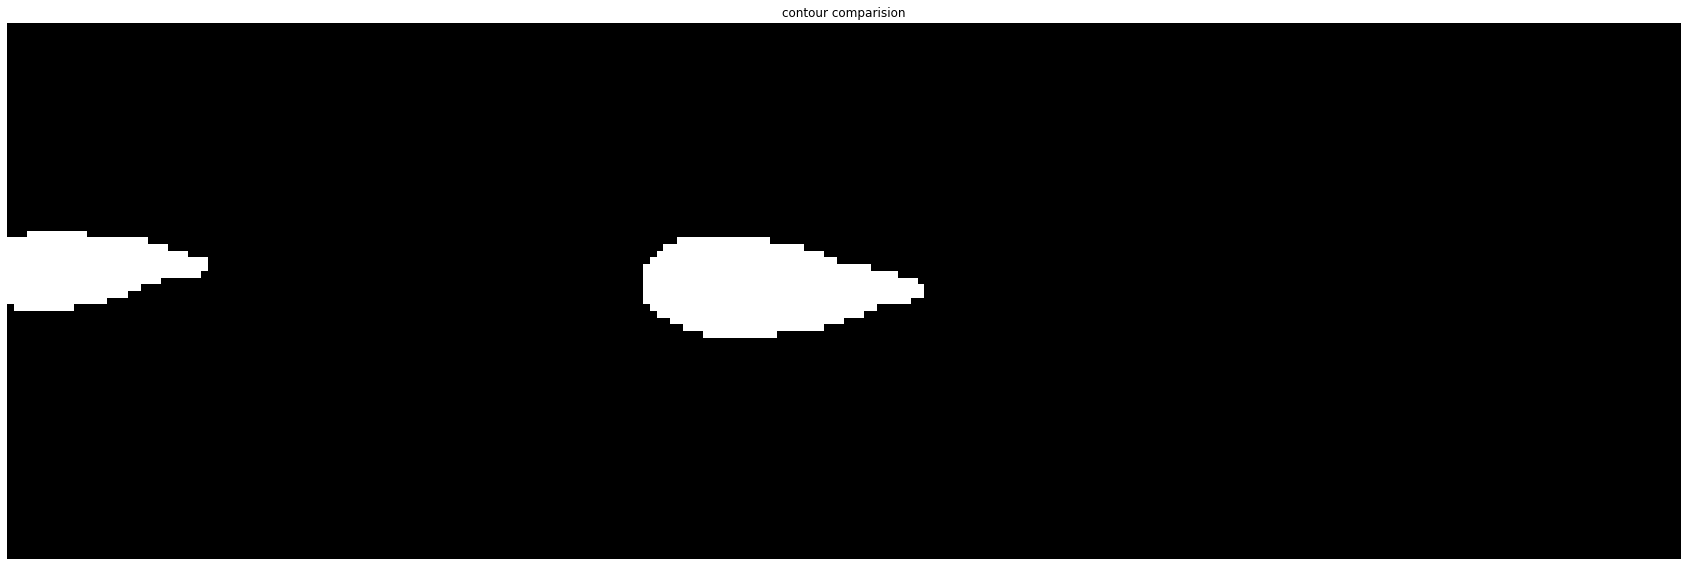

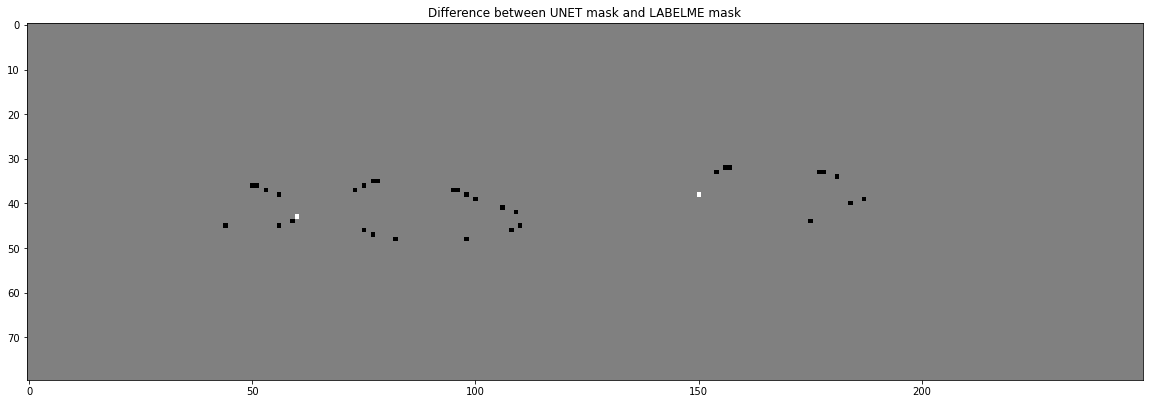

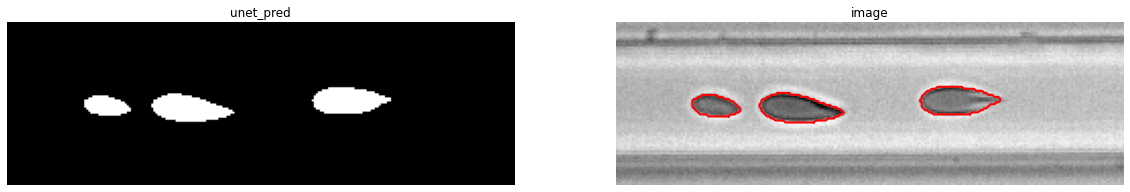

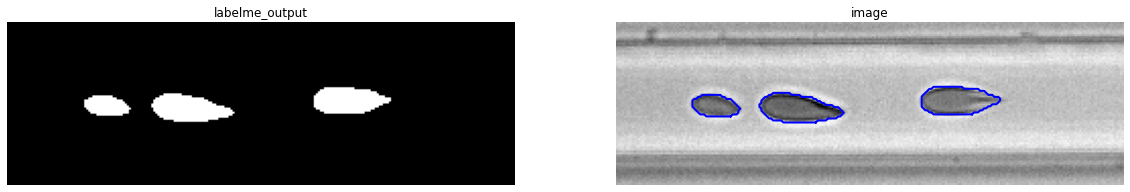

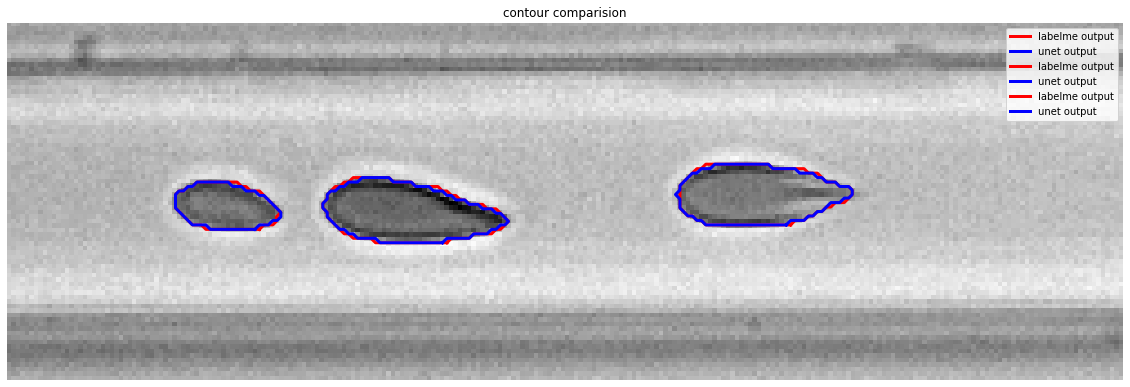

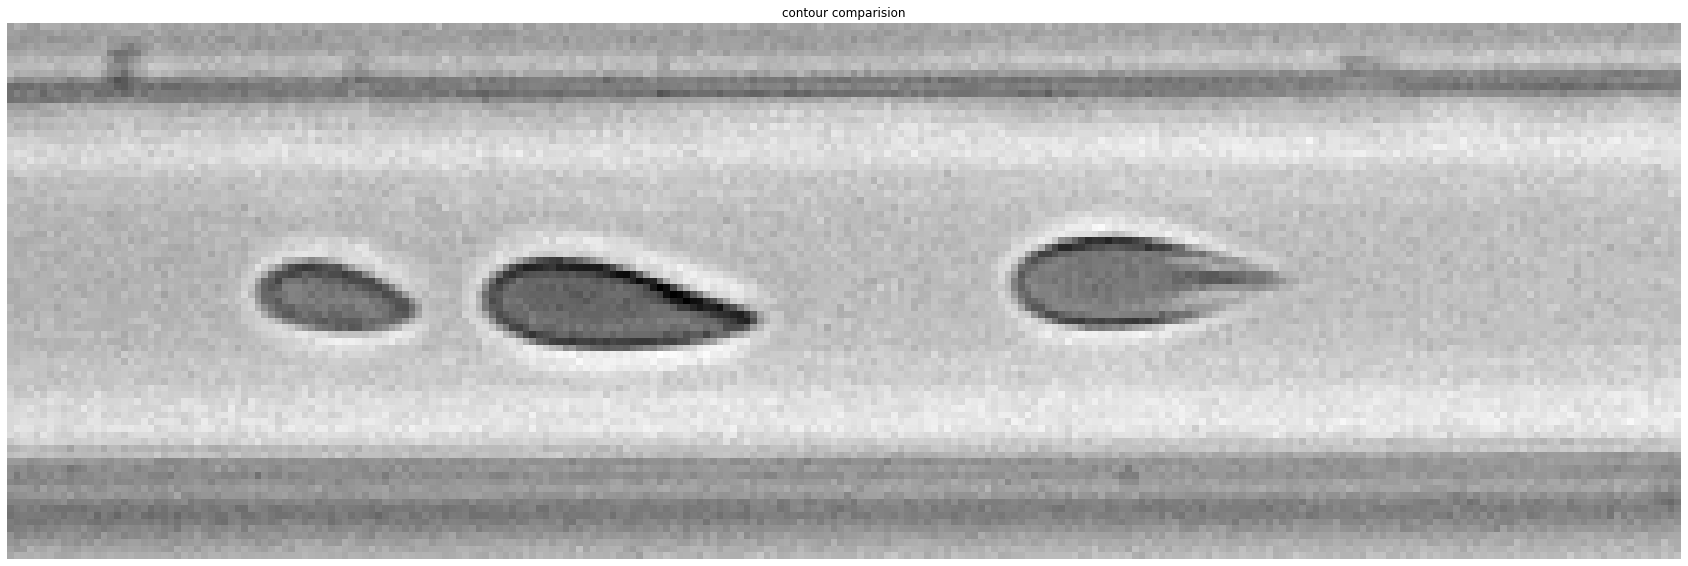

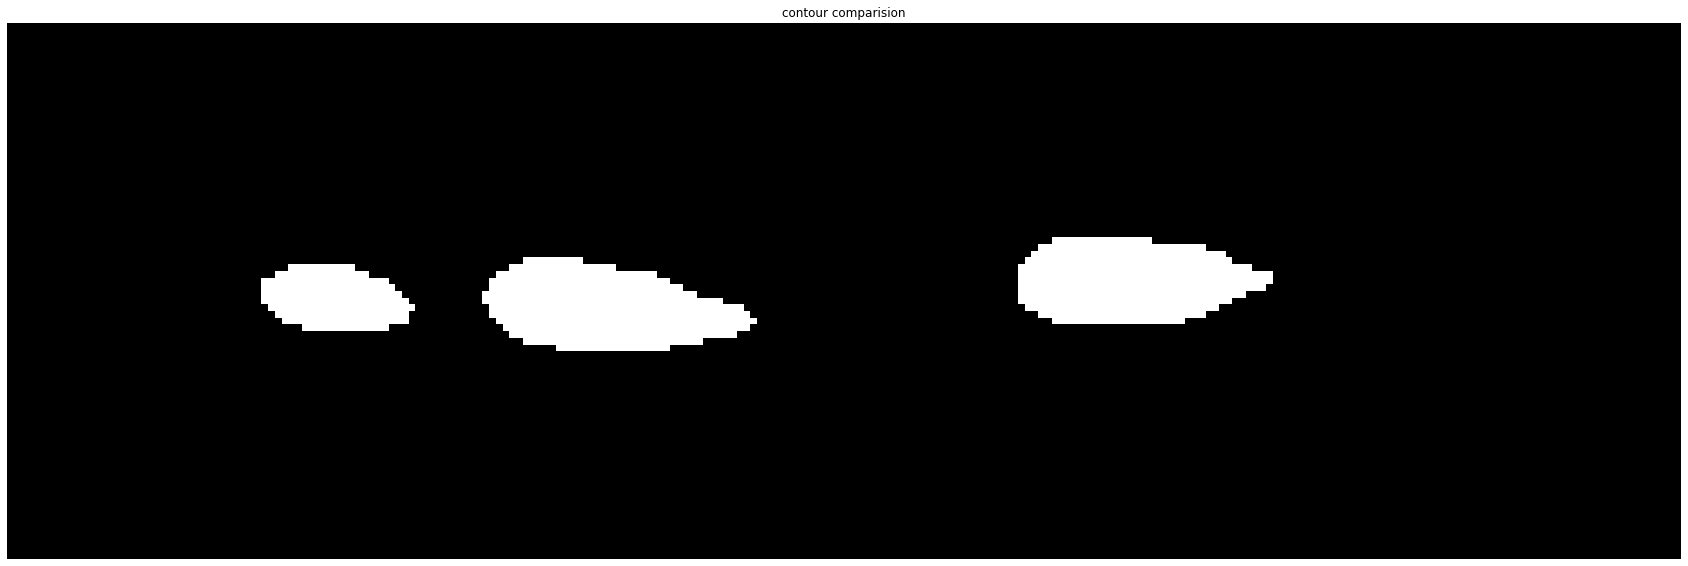

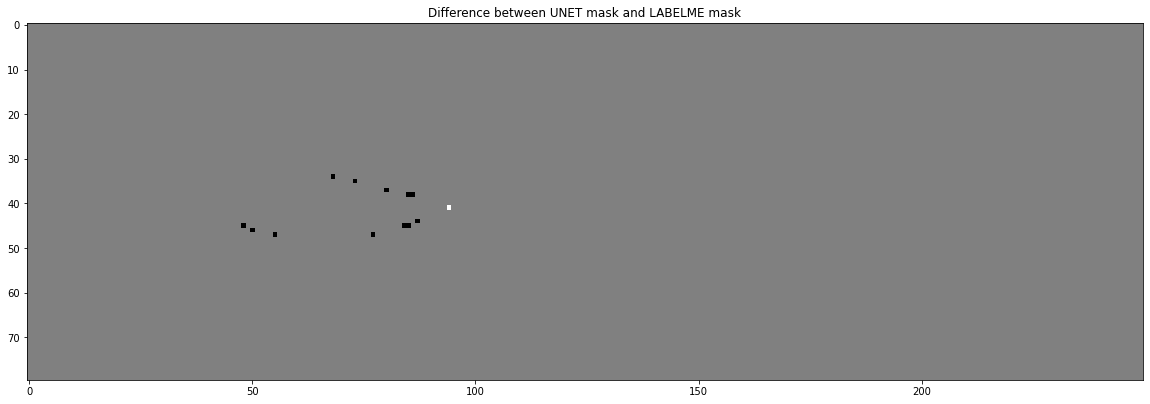

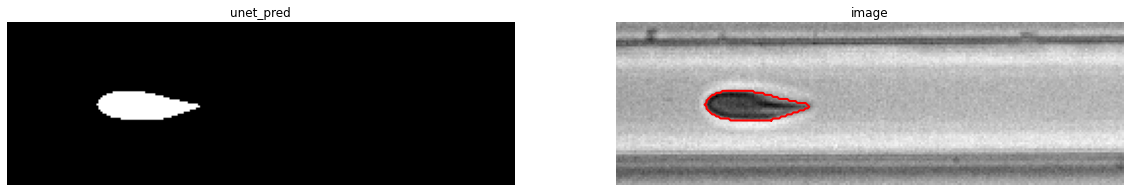

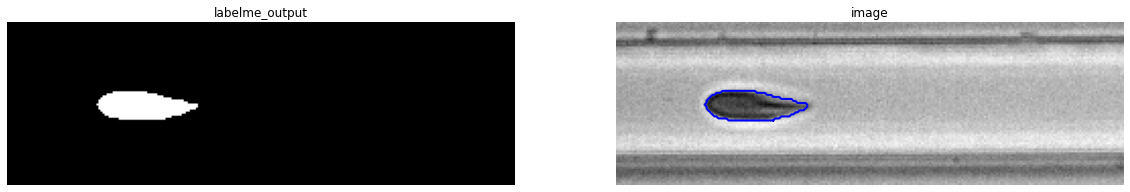

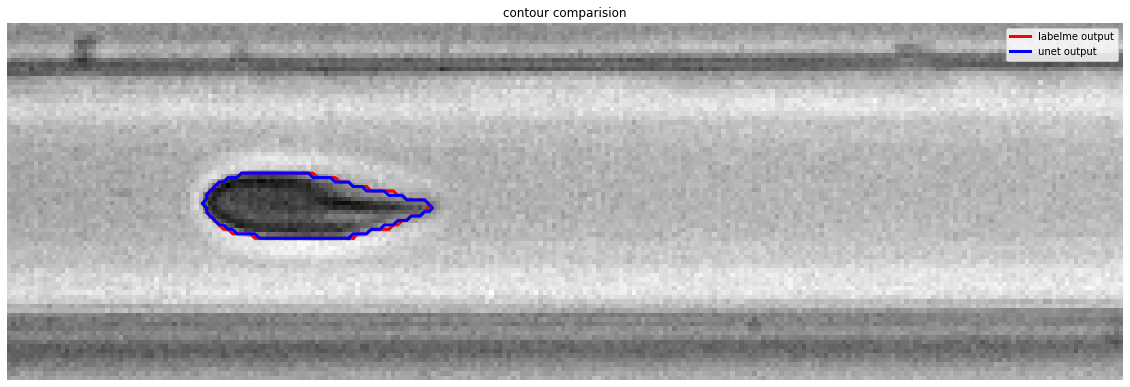

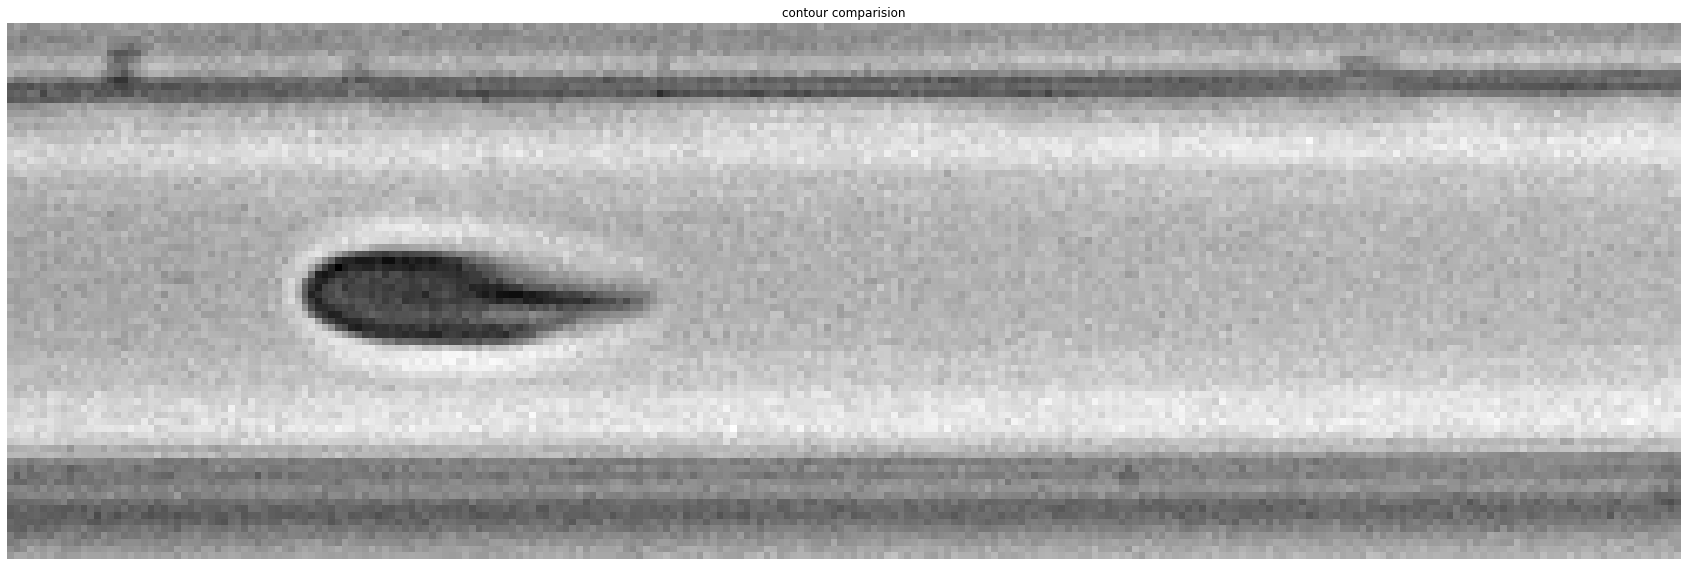

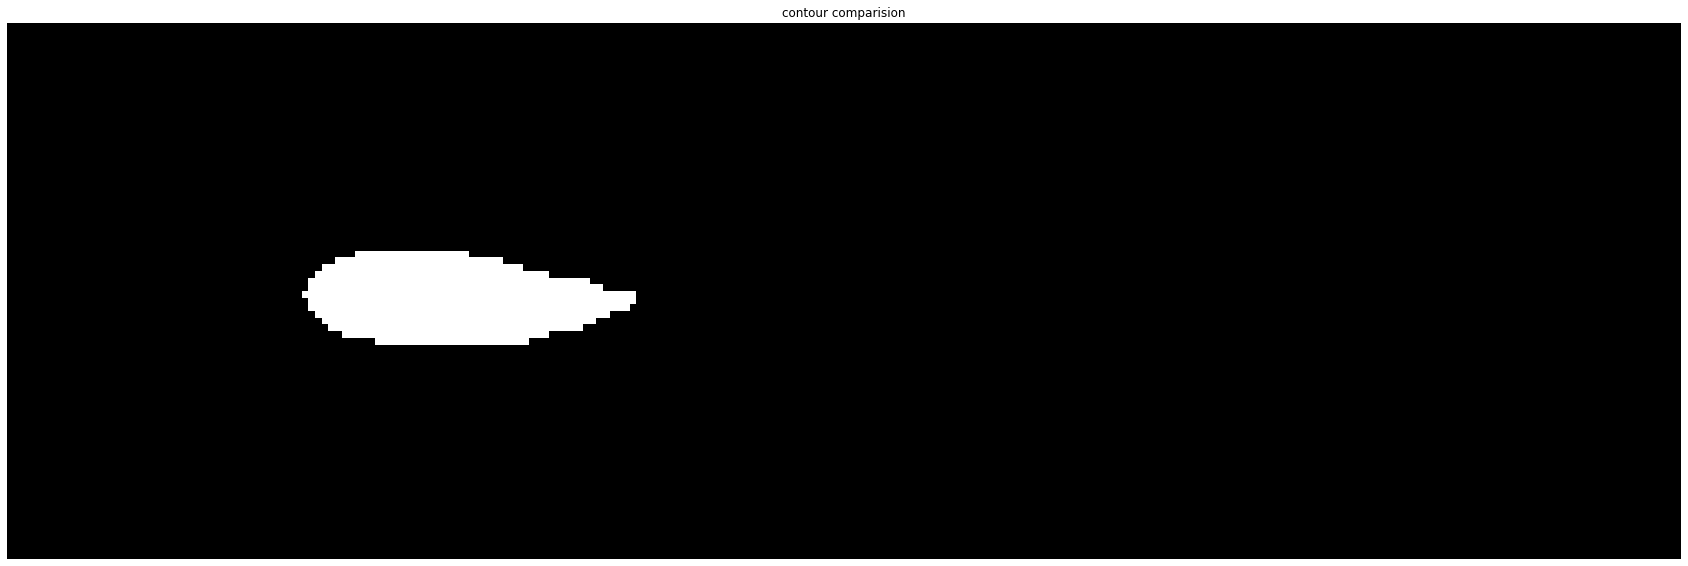

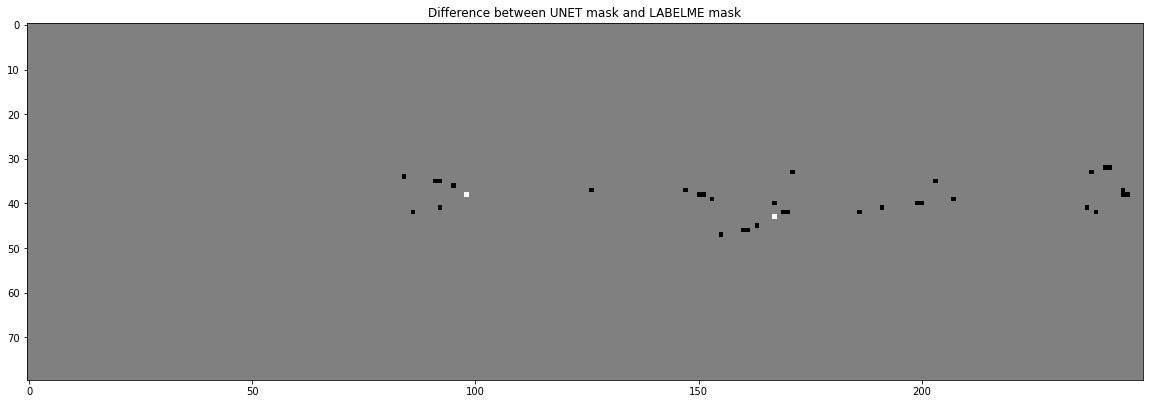

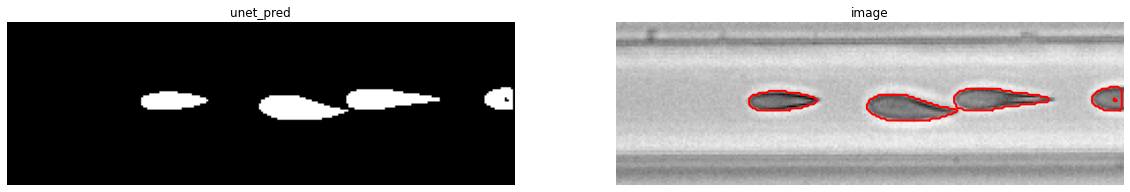

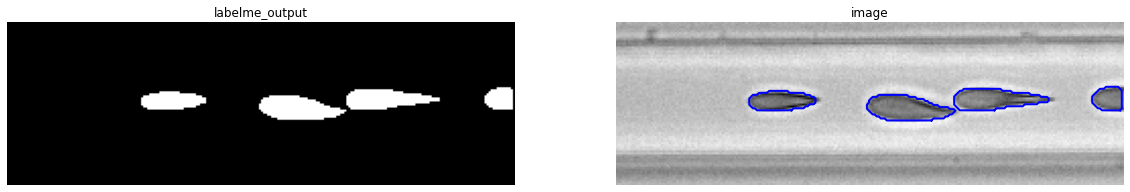

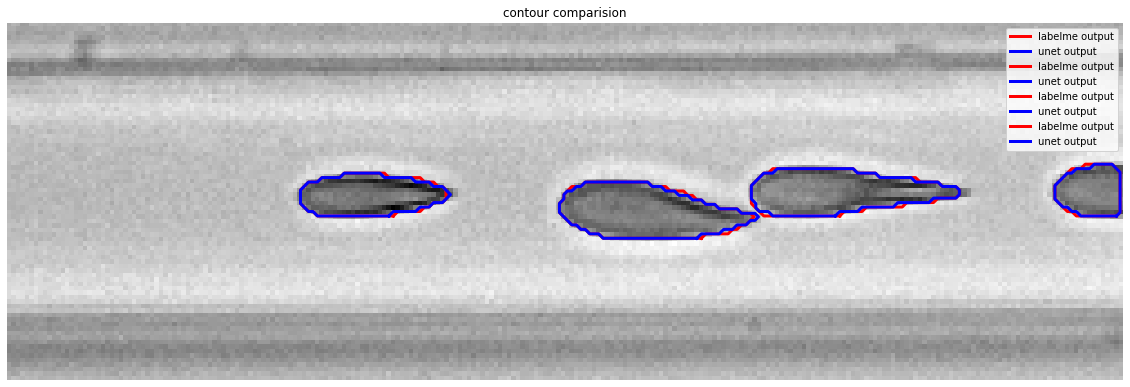

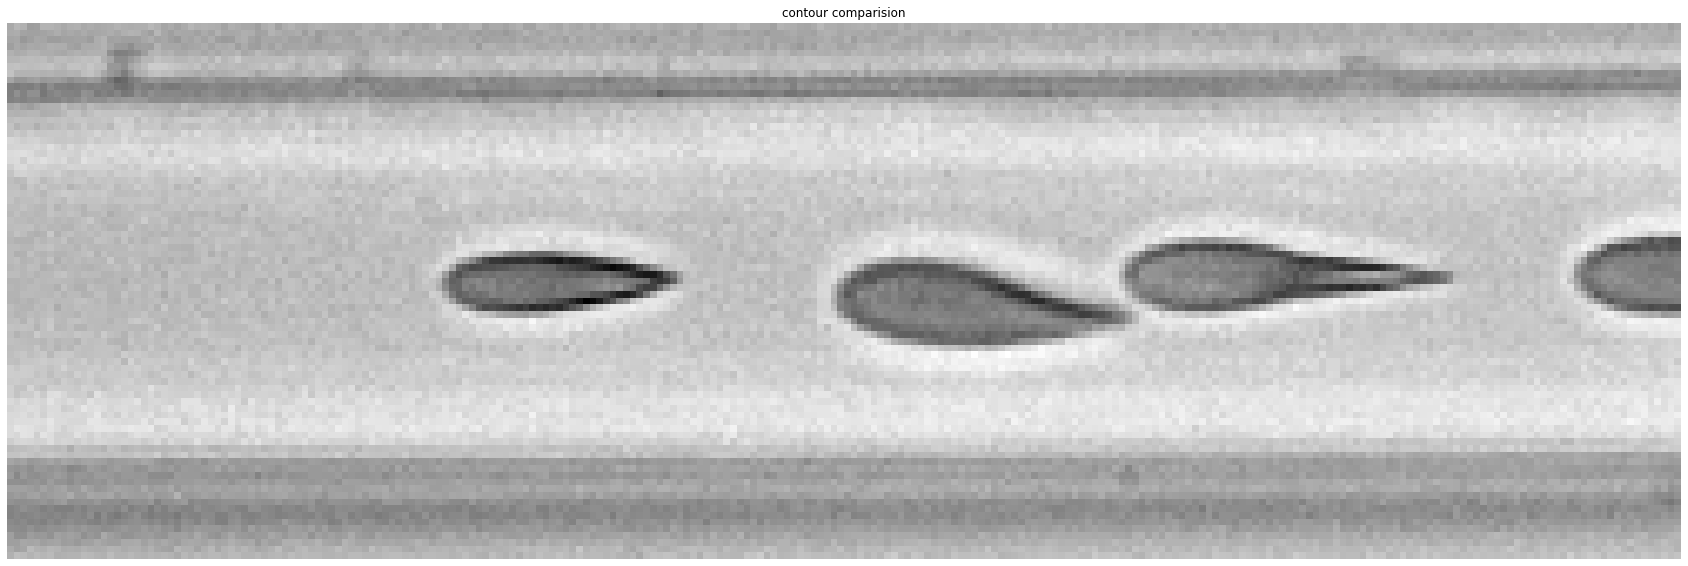

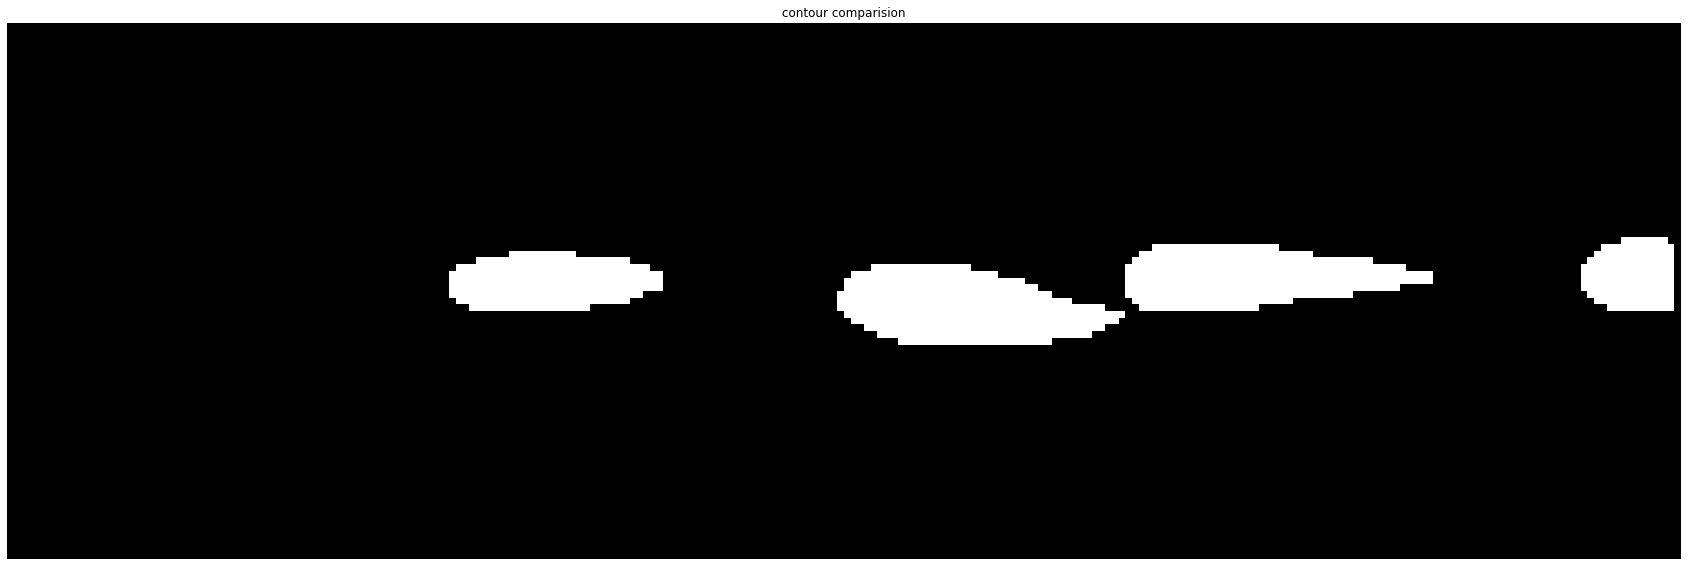

In [69]:
for i in range(5):
    
    unet_cnts = find_contours(unet_preds[i], 0.2,
                             fully_connected="low",
                             positive_orientation="high")
    
    
    labelme_cnts = find_contours(labelme_masks[i], 0.2,
                             fully_connected="low",
                             positive_orientation="high")
    
    
    diff = (unet_preds[i].astype('int') - labelme_masks[i].astype('int'))
    plt.figure(figsize=(20, 10))
    plt.imshow(diff, 'gray')
    plt.title('Difference between UNET mask and LABELME mask')
    plt.show()
    
    
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.axis('off')
    plt.title('unet_pred')
    plt.imshow(unet_preds[i], 'gray')
    plt.subplot(122)
    plt.axis('off')
    plt.title('image')
    plt.imshow(imgs[i], 'gray')
    for c in unet_cnts:
            plt.plot(c[:, 1], c[:, 0], linewidth=2, color='r')
    plt.show()
    
    
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.axis('off')
    plt.title('labelme_output')
    plt.imshow(labelme_masks[i], 'gray')
    plt.subplot(122)
    plt.axis('off')
    plt.title('image')
    plt.imshow(imgs[i], 'gray')
    for c in labelme_cnts:
            plt.plot(c[:, 1], c[:, 0], linewidth=2, color='b')
    plt.show()
    
    
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.title('contour comparision')
    plt.imshow(imgs[i], 'gray')
    for lc, uc in zip(labelme_cnts, unet_cnts):
        plt.plot(lc[:, 1], lc[:, 0], linewidth=3, color='r', label="labelme output")
        plt.plot(uc[:, 1], uc[:, 0], linewidth=3, color='b', label="unet output")
        plt.legend()
    plt.show()
    
    plt.figure(figsize=(30, 10))
    plt.axis('off')
    plt.title('contour comparision')
    plt.imshow(imgs[i], 'gray')
    plt.show()
    
    plt.figure(figsize=(30, 10))
    plt.axis('off')
    plt.title('contour comparision')
    plt.imshow(labelme_masks[i], 'gray')
    plt.show()
    
    